In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from iris_ring_divider import IrisRingDivider
from processor import ImageProcessor  # replace with actual filename
import glob


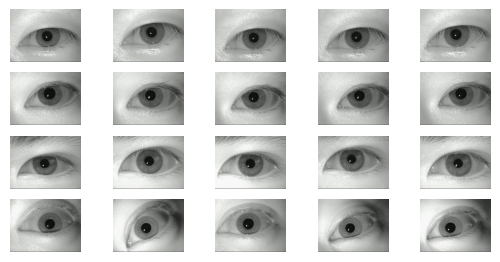

In [2]:
# Load multiple images from a folder
image_paths = [glob.glob('../img/img/11/left/*.bmp'),glob.glob('../img/img/18/left/*.bmp'),glob.glob('../img/img/29/left/*.bmp'), glob.glob('../img/img/30/left/*.bmp')] # adjust to your images
images = []
for path in image_paths:
    for img_path in path:
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)

# Display the images
for i, img in enumerate(images):
    plt.subplot(6, 5, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()


In [3]:
iris_codes = []
metadata = []

for img in images:
    processor = ImageProcessor(img)

    # Detect pupil and iris
    pupil_image, x_pupil, y_pupil, r_pupil = processor.detect_pupil()
    iris_image, x_iris, y_iris, r_iris = processor.detect_iris()

    # Create iris divider
    divider = IrisRingDivider(img, x_pupil, y_pupil, r_pupil, r_iris)

    # Generate code
    iris_code = divider.create_iris_code()

    # Store result
    iris_codes.append(iris_code)
    metadata.append({
        'pupil_center': (x_pupil, y_pupil),
        'pupil_radius': r_pupil,
        'iris_radius': r_iris
    })


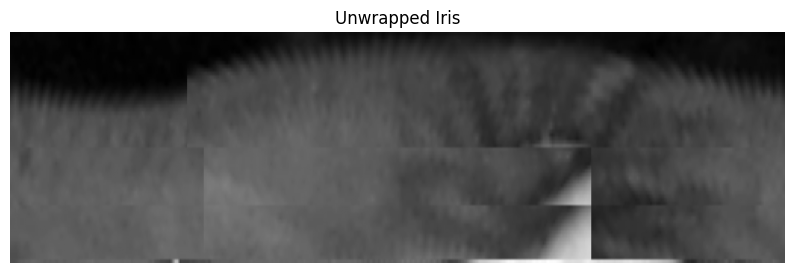

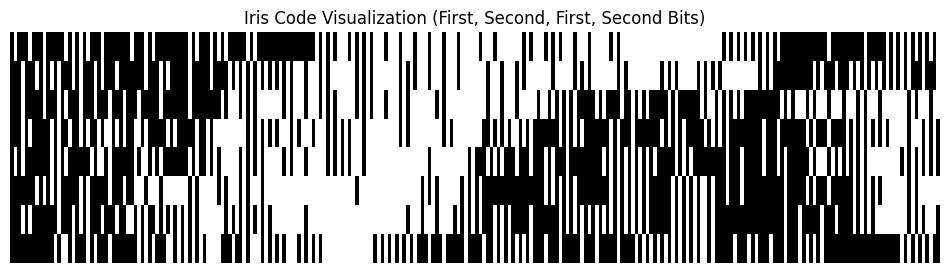

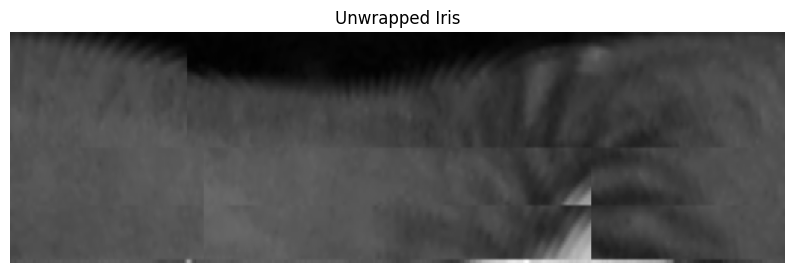

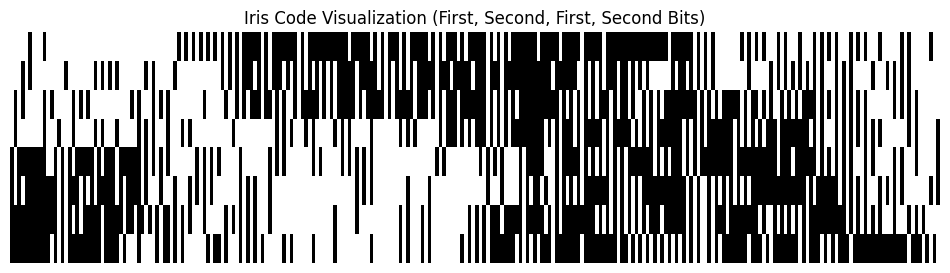

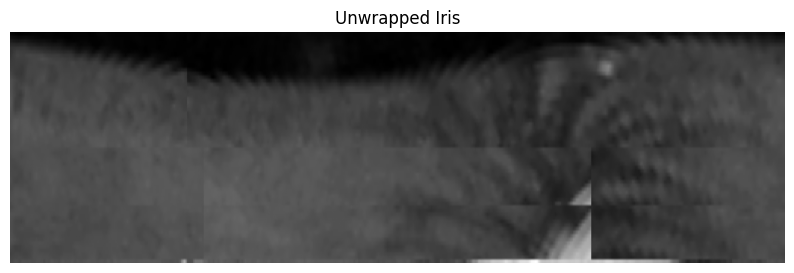

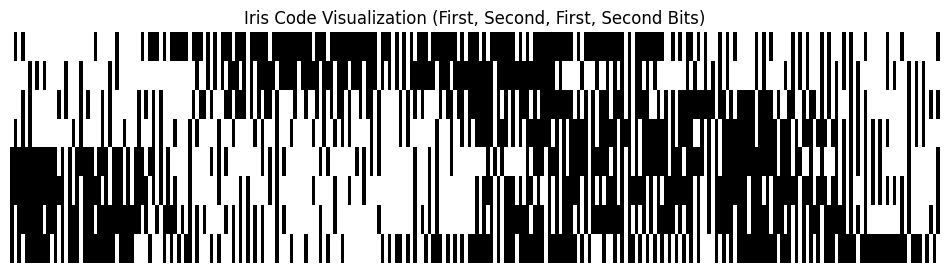

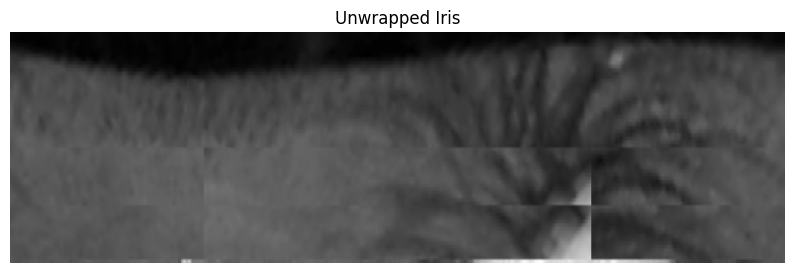

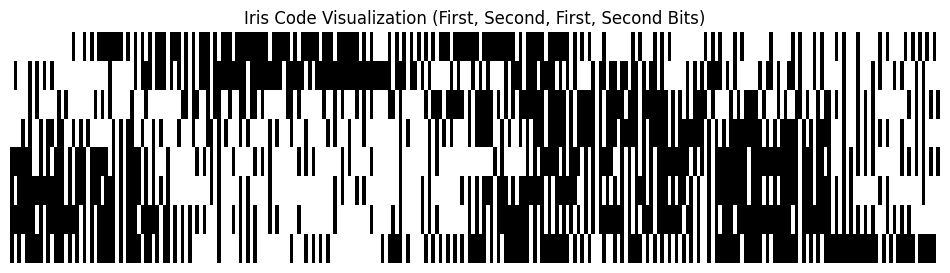

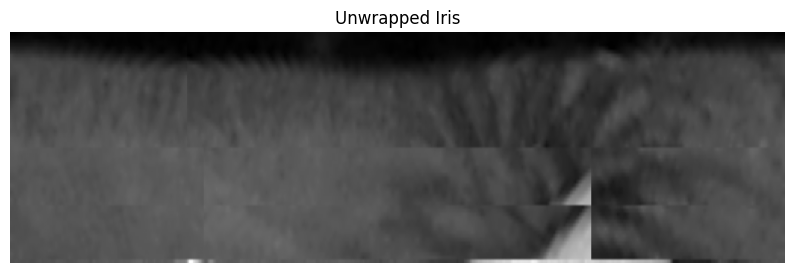

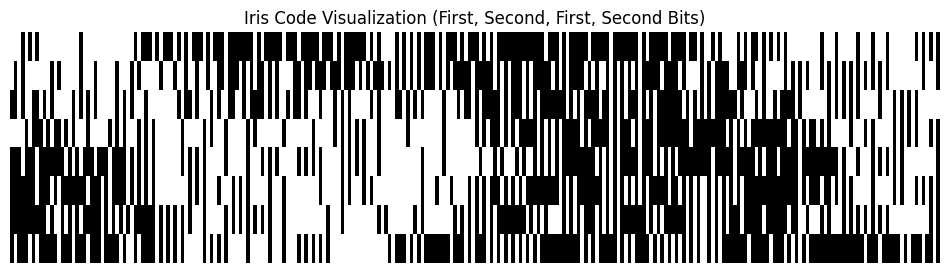

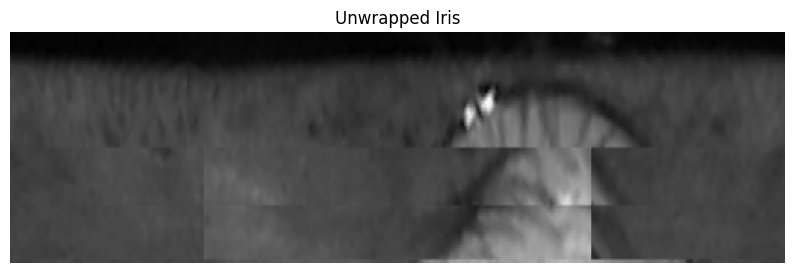

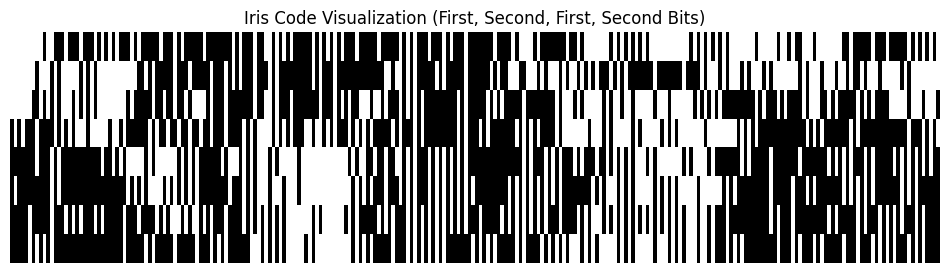

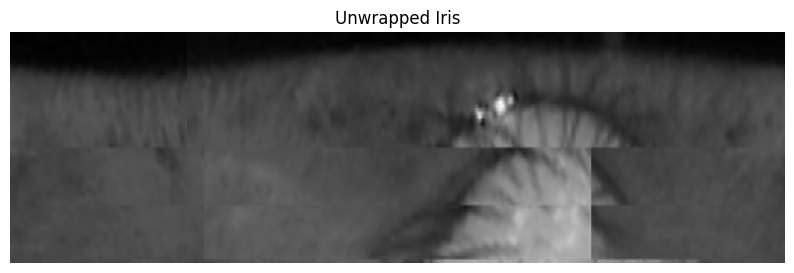

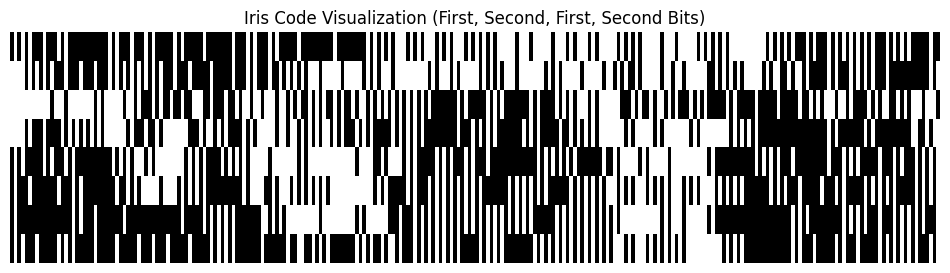

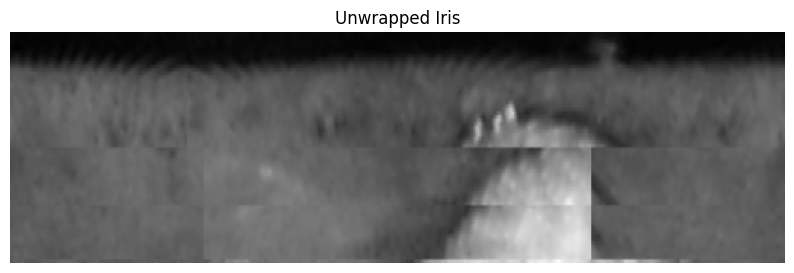

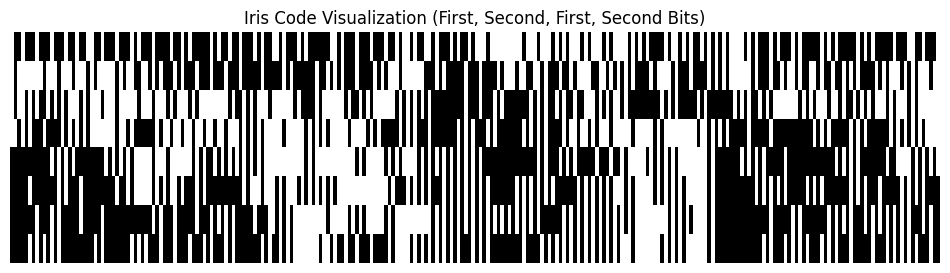

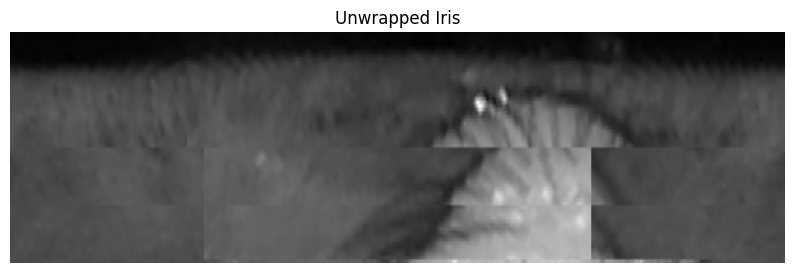

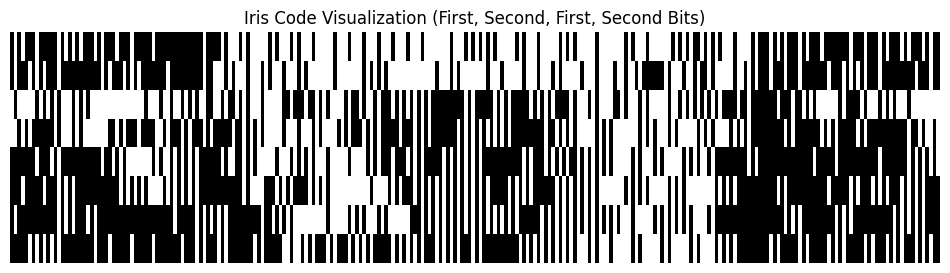

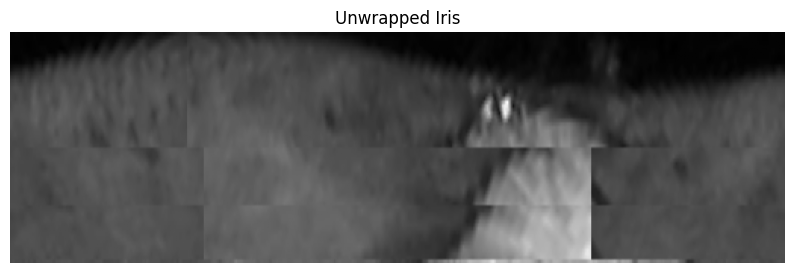

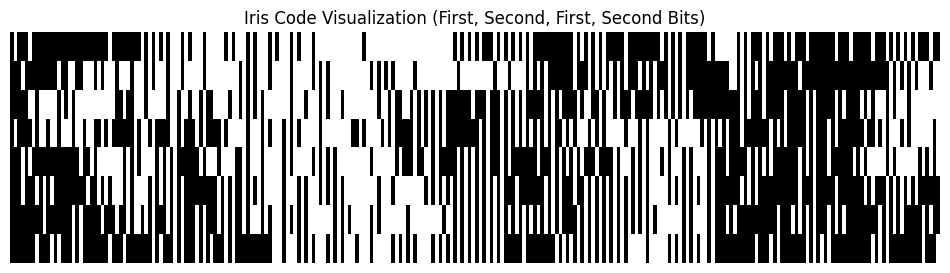

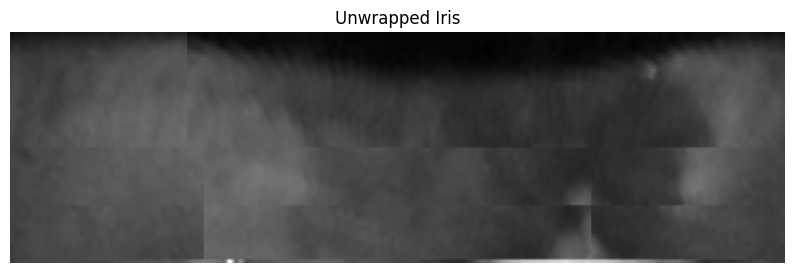

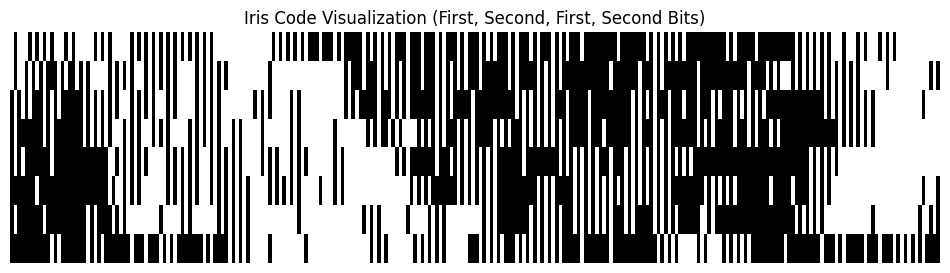

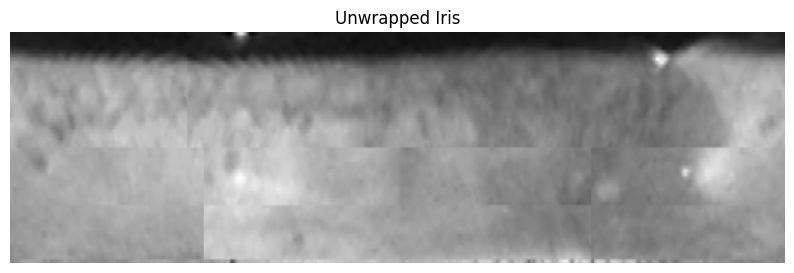

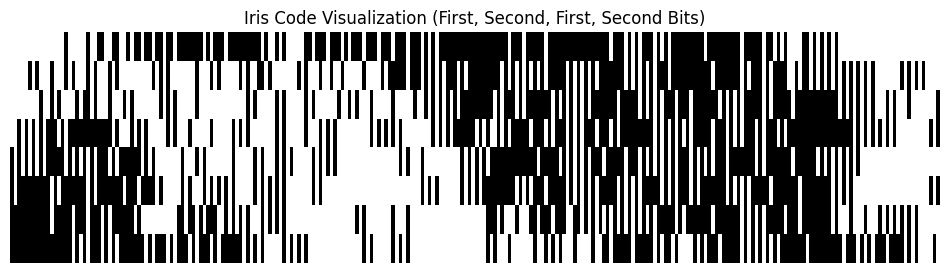

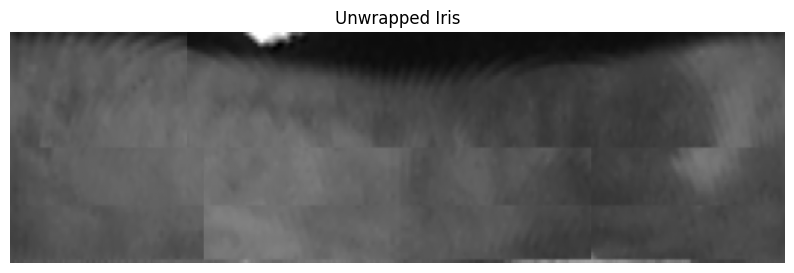

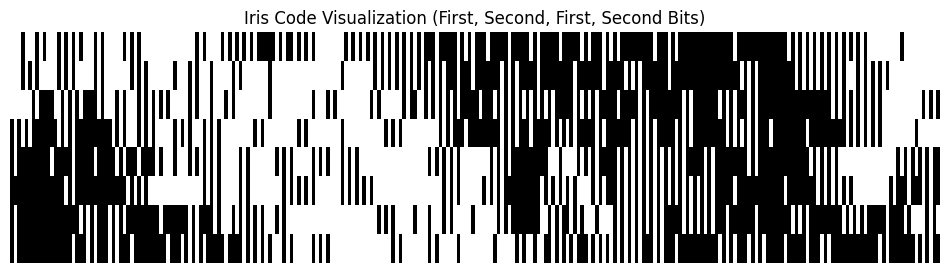

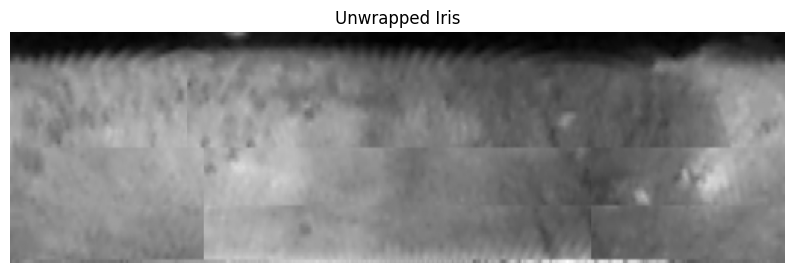

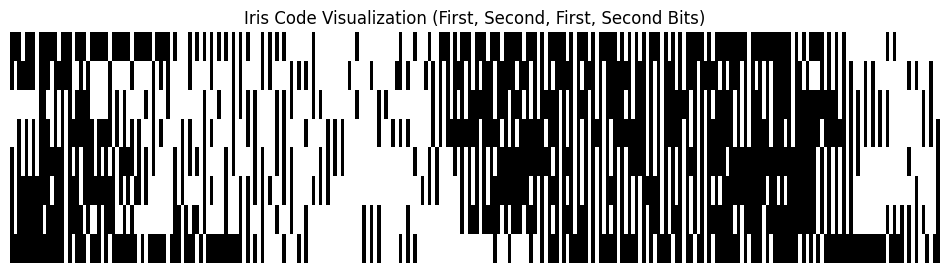

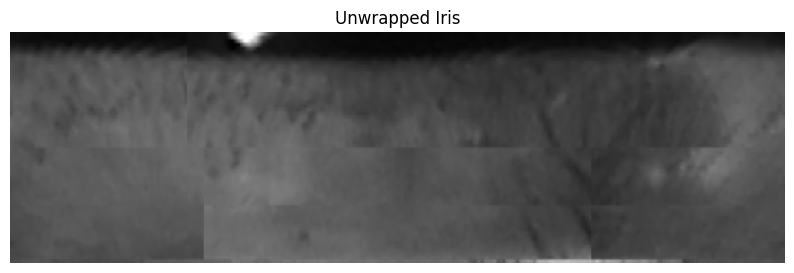

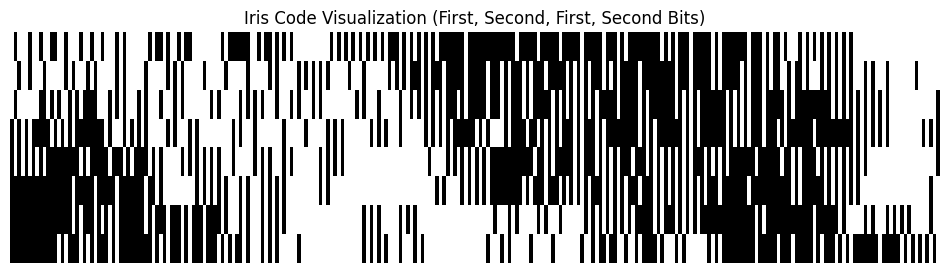

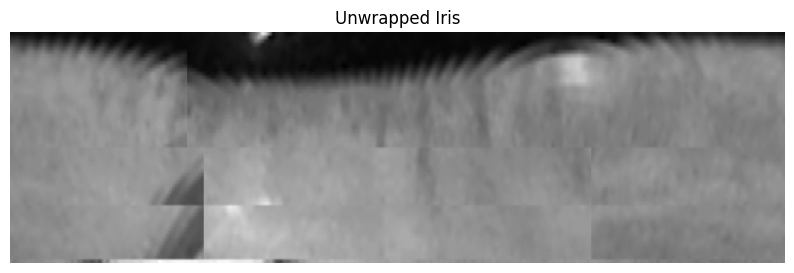

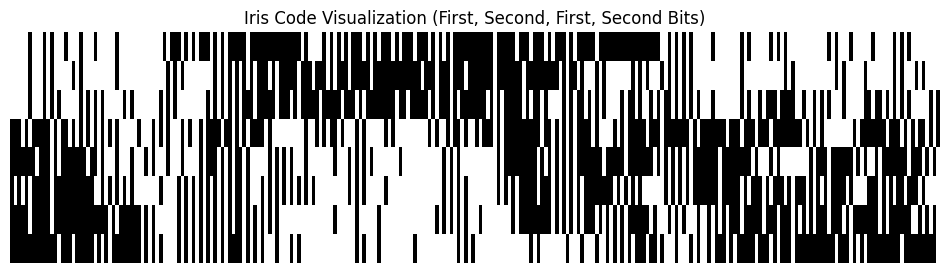

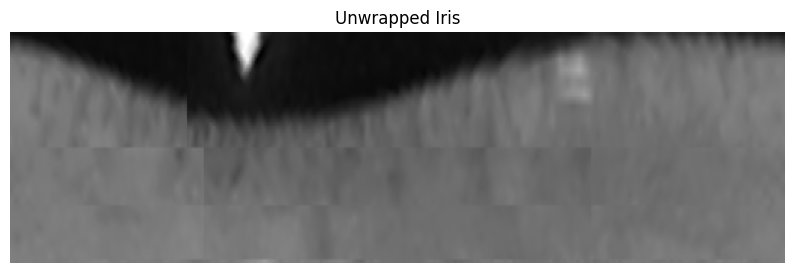

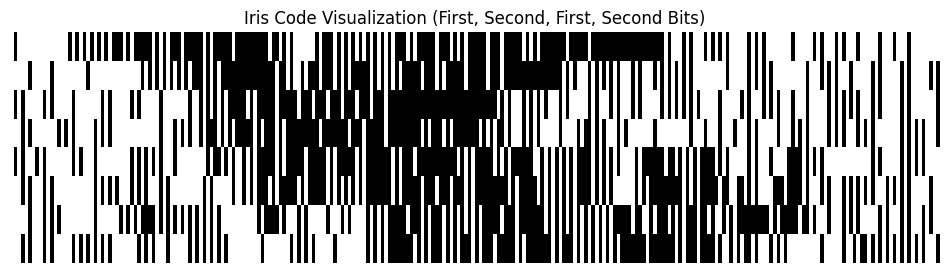

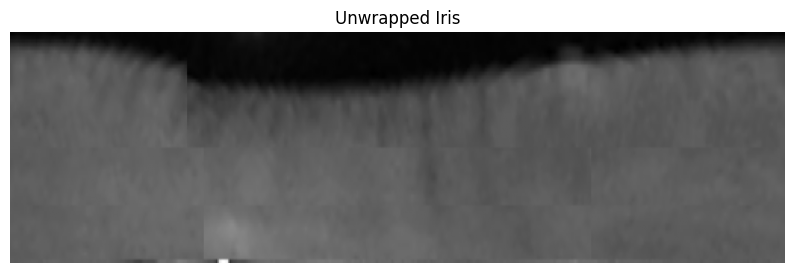

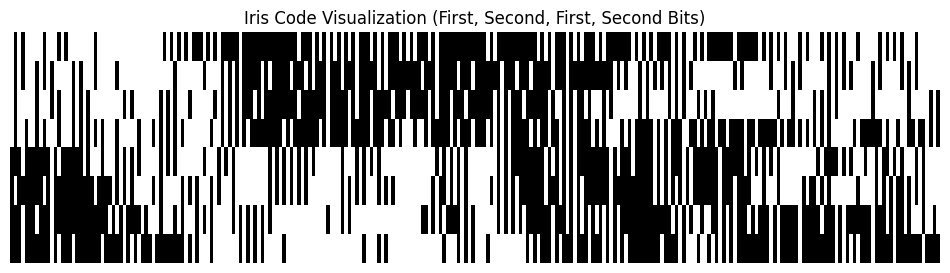

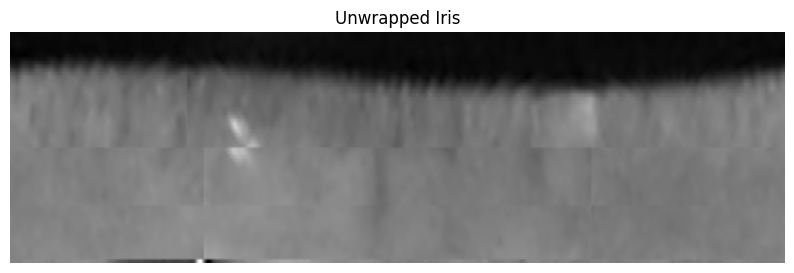

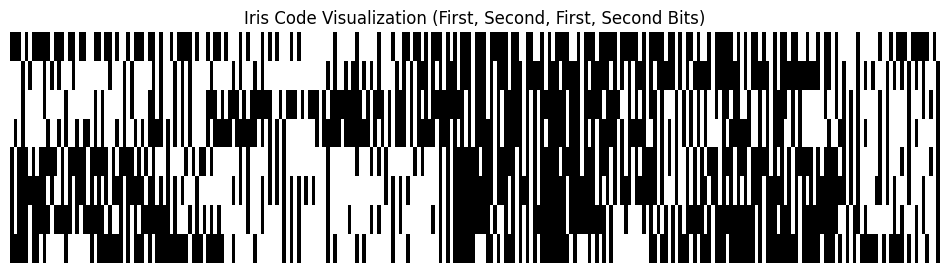

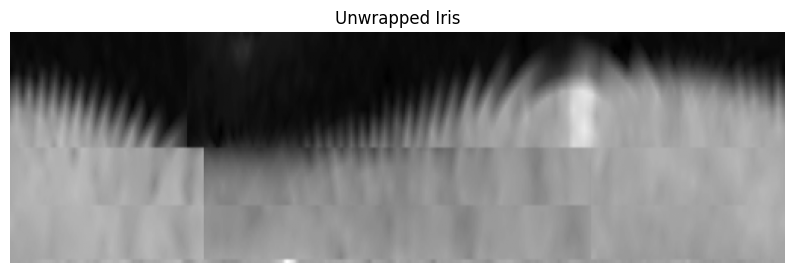

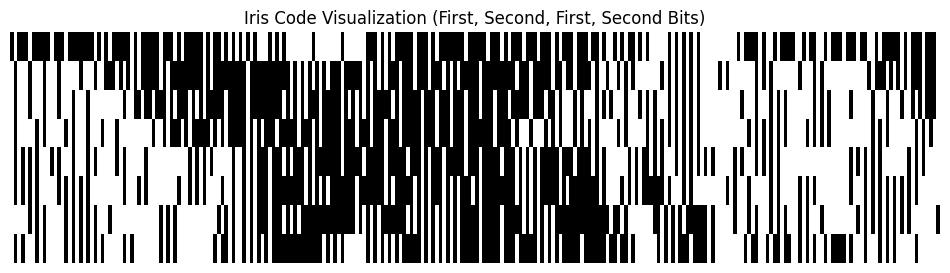

In [5]:
for i, img in enumerate(images):
    processor = ImageProcessor(img)
    pupil_image, x_pupil, y_pupil, r_pupil = processor.detect_pupil()
    iris_image, x_iris, y_iris, r_iris = processor.detect_iris()

    divider = IrisRingDivider(img, x_pupil, y_pupil, r_pupil, r_iris)
    divider.display_normalized_iris()
    divider.display_iris_code()


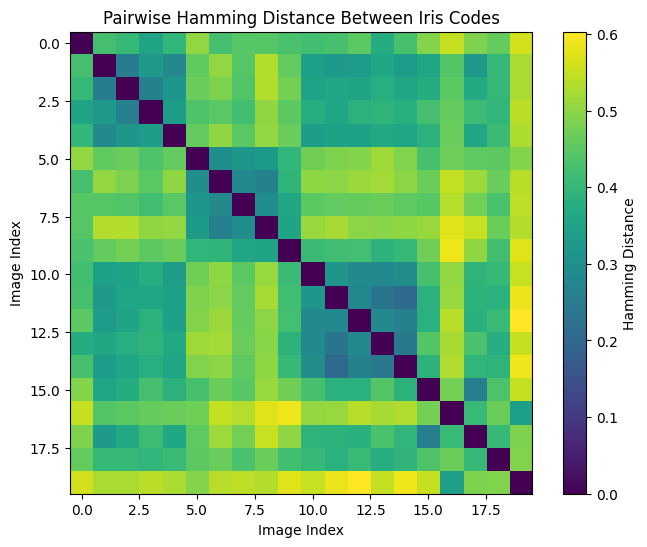

In [6]:
n = len(iris_codes)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = IrisRingDivider.calculate_hamming_distance(
            None, iris_codes[i], iris_codes[j]
        )

plt.figure(figsize=(8, 6))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Hamming Distance')
plt.title('Pairwise Hamming Distance Between Iris Codes')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()
